# Домашнее задание «Проблема качества данных»

**Описание задания:**

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.


# 1. Получите и загрузите данные.

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data_1 = pd.read_csv('train.csv')
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [37]:
#удалим пропуски
data_1 = data_1.dropna()

In [38]:
data_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
data_1.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

In [40]:
#обучим модель, исключив категориальные признаки
X = data_1[['Age', 'SibSp', 'Parch', 'Fare']]
y = data_1.Survived

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
predictions = model.predict_proba(X_test)

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
#вычислим значение ROC-AUC метрики
roc_auc_score(y_test, predictions[:, 1])

0.6098901098901098

# 3. Снова загрузите полные данные.

In [48]:
data_2 = pd.read_csv('train.csv')
data_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [49]:
data_2.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
#удалим ID пассажира, идентифицирующий номер записи в таблице и никак невлияющий вообще ни на что
#удалим имя пассажира, так как от него тоже ничего не зависит
#удалим номер билета и Cabin, так как разделение по классам представлено отдельно
data_2 = data_2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 5. Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [51]:
data_2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [52]:
#рассчитаем процент данных который будет потерян, если просто удалить пропуски
data_3 = data_2.dropna()
100 - data_3.shape[0]/data_2.shape[0]*100

20.08978675645342

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [53]:
#в Embarked всего 2 пропуска и 3 уникальных значения, заменим пропуски модой - самым популярным значением
data_2.Embarked.fillna(data_2.Embarked.mode()[0], inplace = True)

In [54]:
#возраст пассажира заменим средним значением
data_2['Age'].fillna(data_2['Age'].mean(), inplace = True)

# 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [55]:
data_2 = pd.get_dummies(data_2, columns = ['Pclass', 'Sex', 'Embarked'])

# 7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [56]:
data_2.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

<Axes: >

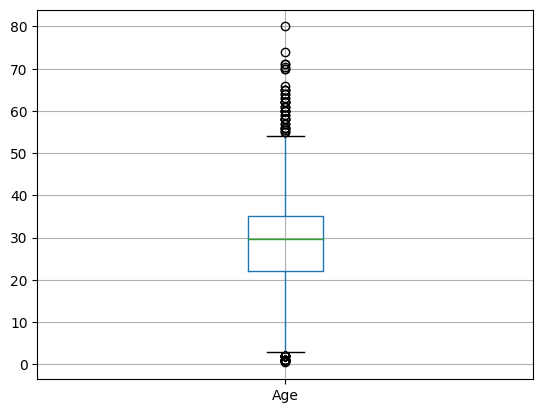

In [57]:
data_2.boxplot(['Age'])

<Axes: >

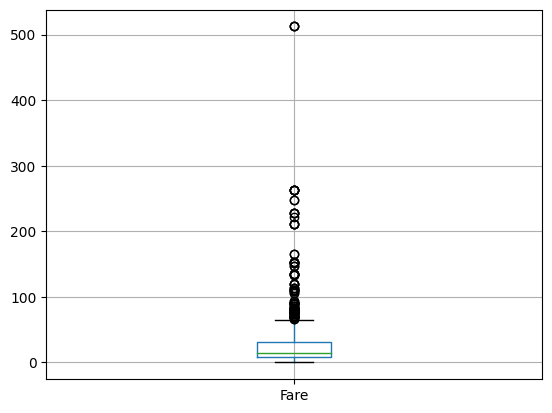

In [58]:
data_2.boxplot(['Fare'])

In [59]:
#в Fare все значения выше 200 создают дополнительный шум, удалим их
data_2 = data_2[data_2.Fare < 200]

# 9. Попробуйте математически преобразовать признак Age.

In [60]:
#преобразуем признак Age, логарифмируя его значения
data_2['Age'] = np.log1p(data_2['Age'])

# 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [61]:
X2 = data_2.drop(columns=['Survived'], axis=1)

In [62]:
y2 = data_2.Survived

In [63]:
model = LogisticRegression()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [65]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions = model.predict_proba(X_test)

In [67]:
#вычислим значение ROC-AUC метрики
roc_auc_score(y_test, predictions[:, 1])

0.8296696586676435

# 11. Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

**ВЫВОД**

Для обучения модели были удалены выбросы, категориальные переменные были переведены в цифровые значения, недостающие данные усредненны или замененены на самые вероятные; над одним из признаков было произведено математическое преобразование - логарифмирование. Для модели без проведенных преобразований ROC-AUC метрика оказалась значительно меньше метрики для модели с данными после указанных преобразований, что говорит о том, что простое удаление недостающих данных, а также отказ от признаков без проведенных преобразований значительно ухудшает качество модели.